In [2]:
import pandas_datareader as pdr
import numpy as np
import datetime as dt
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [25]:
tickers = ['XIC.TO', 'CSU.TO', 'BAM', 'VFV.TO', 'HXQ.TO', 'ZFL.TO', 'PGHY', 'HGY.TO', 'VRE.TO', 'XEF.TO', 'NVDA', 'MELI', 'ADS', '^GSPC']
start = dt.datetime(2018, 12, 30)
end = dt.datetime(2021, 12, 30)
df_stocks = pdr.get_data_yahoo(tickers, start, end, interval="d")

df_stocks = df_stocks['Adj Close']

df_stocks

Symbols,XIC.TO,CSU.TO,BAM,VFV.TO,HXQ.TO,ZFL.TO,PGHY,HGY.TO,VRE.TO,XEF.TO,NVDA,MELI,ADS,^GSPC
Date,,,,,,,,,,,,,,
2018-12-31,21.078621,865.645020,24.663780,57.912556,12.005000,15.984074,19.428423,3.993624,26.817968,26.027300,33.161438,292.850006,114.277779,2506.850098
2019-01-02,21.087870,842.712769,24.412958,57.941284,12.055000,16.131479,19.454100,3.993624,26.711586,25.785444,33.837074,298.010010,118.313438,2510.030029
2019-01-03,20.875145,817.719788,24.367939,56.025875,11.600000,16.352585,19.454100,4.010691,26.525414,25.320341,31.792747,296.589996,115.320938,2447.889893
2019-01-04,21.217358,834.748352,25.377642,57.644398,12.007500,16.168327,19.505453,3.976559,26.747046,25.971489,33.829636,315.329987,123.125786,2531.939941
2019-01-07,21.319098,872.430725,25.750652,57.606094,12.062500,16.094625,19.548244,3.993624,27.021870,25.915676,35.620598,328.940002,123.118164,2549.689941
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-24,33.737690,2325.000000,NaN,107.399185,59.110001,17.817001,NaN,5.114951,37.893097,35.696564,NaN,NaN,NaN,NaN
2021-12-27,NaN,NaN,60.810001,NaN,NaN,NaN,21.299999,NaN,NaN,NaN,309.450012,1299.109985,68.050003,4791.189941
2021-12-28,NaN,NaN,60.840000,NaN,NaN,NaN,21.290001,NaN,NaN,NaN,303.220001,1316.280029,67.830002,4786.350098


In [26]:
# Checking how many missing NaN
df_stocks.isna().sum()

Symbols
XIC.TO    16
CSU.TO    16
BAM       13
VFV.TO    16
HXQ.TO    16
ZFL.TO    16
PGHY      13
HGY.TO    16
VRE.TO    16
XEF.TO    16
NVDA      13
MELI      13
ADS       13
^GSPC     13
dtype: int64

In [27]:
# Checking if there are double-dates (divident stocks might show date a second time for the divident value)
print(df_stocks.index.has_duplicates)
print(df_stocks.index.nunique())
print(len(df_stocks))

False
770
770


In [28]:
# No duplicated dates
# 1.9% NaN for specific stocks; it is not a big impact to fill these gaps and certainly stem from days where certain stock markets were closed and others not.
df_stocks.fillna(method="ffill", inplace=True)
df_stocks

Symbols,XIC.TO,CSU.TO,BAM,VFV.TO,HXQ.TO,ZFL.TO,PGHY,HGY.TO,VRE.TO,XEF.TO,NVDA,MELI,ADS,^GSPC
Date,,,,,,,,,,,,,,
2018-12-31,21.078621,865.645020,24.663780,57.912556,12.005000,15.984074,19.428423,3.993624,26.817968,26.027300,33.161438,292.850006,114.277779,2506.850098
2019-01-02,21.087870,842.712769,24.412958,57.941284,12.055000,16.131479,19.454100,3.993624,26.711586,25.785444,33.837074,298.010010,118.313438,2510.030029
2019-01-03,20.875145,817.719788,24.367939,56.025875,11.600000,16.352585,19.454100,4.010691,26.525414,25.320341,31.792747,296.589996,115.320938,2447.889893
2019-01-04,21.217358,834.748352,25.377642,57.644398,12.007500,16.168327,19.505453,3.976559,26.747046,25.971489,33.829636,315.329987,123.125786,2531.939941
2019-01-07,21.319098,872.430725,25.750652,57.606094,12.062500,16.094625,19.548244,3.993624,27.021870,25.915676,35.620598,328.940002,123.118164,2549.689941
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-24,33.737690,2325.000000,59.939999,107.399185,59.110001,17.817001,21.290001,5.114951,37.893097,35.696564,296.399994,1262.729980,69.070000,4725.790039
2021-12-27,33.737690,2325.000000,60.810001,107.399185,59.110001,17.817001,21.299999,5.114951,37.893097,35.696564,309.450012,1299.109985,68.050003,4791.189941
2021-12-28,33.737690,2325.000000,60.840000,107.399185,59.110001,17.817001,21.290001,5.114951,37.893097,35.696564,303.220001,1316.280029,67.830002,4786.350098


In [29]:
df_stocks.describe()

Symbols,XIC.TO,CSU.TO,BAM,VFV.TO,HXQ.TO,ZFL.TO,PGHY,HGY.TO,VRE.TO,XEF.TO,NVDA,MELI,ADS,^GSPC
count,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000
mean,26.869739,1530.237364,39.118523,78.533610,24.246464,18.002644,20.559364,4.814797,30.906595,30.335837,112.371077,1023.276117,78.120469,3466.701412
std,3.751674,345.265241,9.560117,13.057270,14.267909,1.156823,0.834006,0.479984,4.098268,3.097153,73.469614,489.030590,30.423131,639.484719
min,17.139841,817.719788,21.612251,56.025875,11.600000,15.845879,16.551647,3.925595,18.552404,22.093575,31.792747,292.850006,17.649183,2237.399902
25%,24.328180,1267.651611,31.725783,67.421080,14.584375,17.142757,20.198022,4.434936,28.349170,28.128266,46.873568,579.199997,55.979742,2934.704956
50%,25.613499,1493.828491,36.022667,75.709255,19.622499,17.764736,20.443169,4.987541,31.247707,29.288013,95.570896,977.315002,80.132893,3275.359985
75%,30.079420,1733.559235,44.931884,87.934902,23.503749,19.067128,21.337170,5.169670,33.499471,33.150745,143.246708,1503.697510,96.822319,4052.247559
max,34.937408,2372.760010,61.710285,108.754997,59.660000,20.632425,21.662685,5.758934,38.529999,36.349186,333.719147,1984.339966,138.266617,4793.060059


In [30]:
df_stocks.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 770 entries, 2018-12-31 to 2021-12-30
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   XIC.TO  770 non-null    float64
 1   CSU.TO  770 non-null    float64
 2   BAM     770 non-null    float64
 3   VFV.TO  770 non-null    float64
 4   HXQ.TO  770 non-null    float64
 5   ZFL.TO  770 non-null    float64
 6   PGHY    770 non-null    float64
 7   HGY.TO  770 non-null    float64
 8   VRE.TO  770 non-null    float64
 9   XEF.TO  770 non-null    float64
 10  NVDA    770 non-null    float64
 11  MELI    770 non-null    float64
 12  ADS     770 non-null    float64
 13  ^GSPC   770 non-null    float64
dtypes: float64(14)
memory usage: 106.4 KB


In [31]:
# Let's create a function that can plot a dataset
def plot_that_chart(df, title):
    df.plot(title=title, figsize=(20, 7))
    plt.grid()

    plt.show();

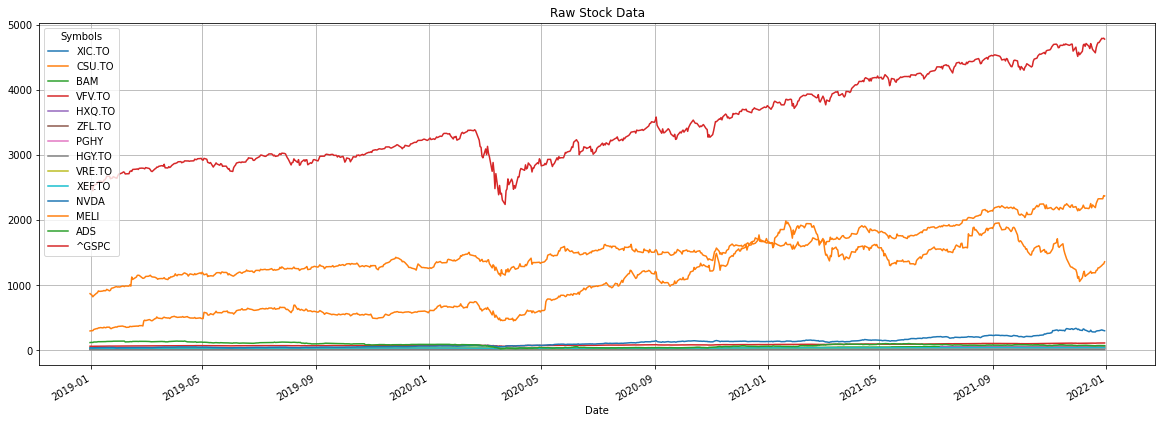

In [32]:
plot_that_chart(df_stocks, 'Raw Stock Data')

In [33]:
# Scaling to first closing values
df_stocks_normalized = df_stocks / df_stocks.iloc[0]
df_stocks_normalized

Symbols,XIC.TO,CSU.TO,BAM,VFV.TO,HXQ.TO,ZFL.TO,PGHY,HGY.TO,VRE.TO,XEF.TO,NVDA,MELI,ADS,^GSPC
Date,,,,,,,,,,,,,,
2018-12-31,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2019-01-02,1.000439,0.973508,0.989830,1.000496,1.004165,1.009222,1.001322,1.000000,0.996033,0.990708,1.020374,1.017620,1.035314,1.001268
2019-01-03,0.990347,0.944636,0.988005,0.967422,0.966264,1.023055,1.001322,1.004273,0.989091,0.972838,0.958726,1.012771,1.009128,0.976480
2019-01-04,1.006582,0.964308,1.028944,0.995370,1.000208,1.011527,1.003965,0.995727,0.997355,0.997856,1.020150,1.076763,1.077425,1.010009
2019-01-07,1.011409,1.007839,1.044068,0.994708,1.004790,1.006916,1.006167,1.000000,1.007603,0.995711,1.074157,1.123237,1.077359,1.017089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-24,1.600564,2.685858,2.430284,1.854506,4.923782,1.114672,1.095817,1.280779,1.412974,1.371505,8.938092,4.311866,0.604404,1.885151
2021-12-27,1.600564,2.685858,2.465559,1.854506,4.923782,1.114672,1.096332,1.280779,1.412974,1.371505,9.331622,4.436093,0.595479,1.911239
2021-12-28,1.600564,2.685858,2.466775,1.854506,4.923782,1.114672,1.095817,1.280779,1.412974,1.371505,9.143753,4.494724,0.593554,1.909308


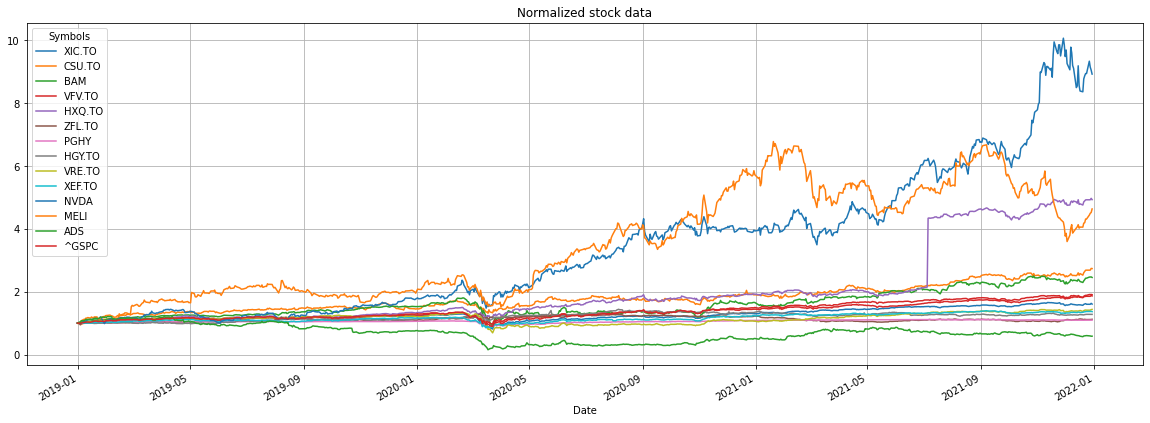

In [34]:
# Plot the normalized stock data
plot_that_chart(df_stocks_normalized, 'Normalized stock data')

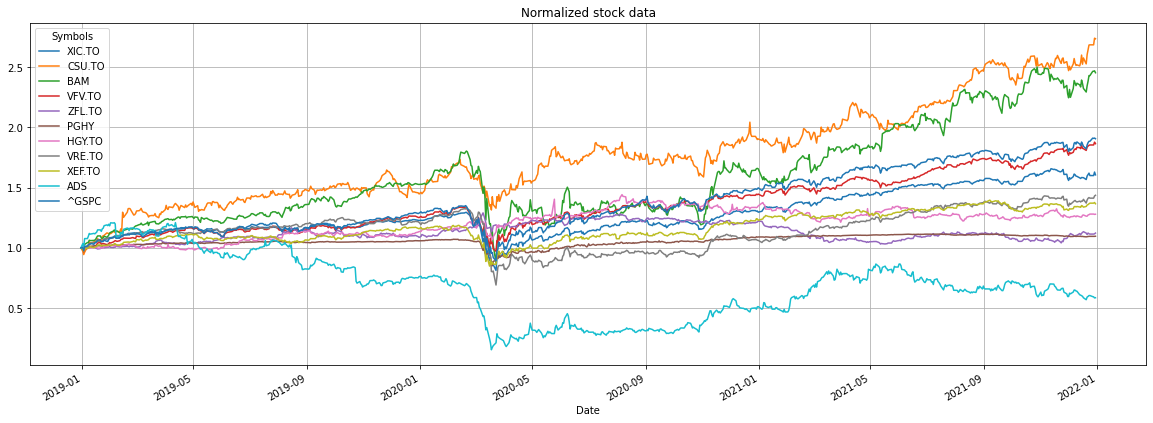

In [35]:
plot_that_chart(df_stocks_normalized.drop(['NVDA', 'HXQ.TO', 'MELI'], axis=1), 'Normalized stock data')

In [36]:
def calc_return(df):
    '''Function to generate a detaframe with returns
    - Input: Dataframe with raw stock data
    - Output: Dataframe with returns'''

    x = df.copy()
    
    for i in range(1, len(df)):
        x.iloc[i] = (df.iloc[i] - df.iloc[i-1]) / df.iloc[i-1] * 100
    #x = np.sum(np.log(df/df.shift()), axis=1)

    x.iloc[0] = 0

    return x

In [37]:
# Generate data table with daily returns
df_stock_returns = calc_return(df_stocks)
df_stock_returns

Symbols,XIC.TO,CSU.TO,BAM,VFV.TO,HXQ.TO,ZFL.TO,PGHY,HGY.TO,VRE.TO,XEF.TO,NVDA,MELI,ADS,^GSPC
Date,,,,,,,,,,,,,,
2018-12-31,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2019-01-02,0.043877,-2.649152,-1.016965,0.049607,0.416495,0.922203,0.132161,0.000000,-0.396683,-0.929238,2.037416,1.761995,3.531448,0.126850
2019-01-03,-1.008754,-2.965777,-0.184407,-3.305776,-3.774367,1.370647,0.000000,0.427349,-0.696973,-1.803743,-6.041677,-0.476499,-2.529299,-2.475673
2019-01-04,1.639331,2.082445,4.143570,2.888884,3.512925,-1.126779,0.263972,-0.851031,0.835546,2.571639,6.406770,6.318484,6.767936,3.433571
2019-01-07,0.479513,4.514220,1.469840,-0.066448,0.458050,-0.455841,0.219382,0.429153,1.027493,-0.214900,5.294063,4.316118,-0.006190,0.701043
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-24,-1.241806,0.069300,0.000000,0.139435,0.067718,-0.223453,0.000000,0.390619,-0.341120,0.389321,0.000000,0.000000,0.000000,0.000000
2021-12-27,0.000000,0.000000,1.451456,0.000000,0.000000,0.000000,0.046963,0.000000,0.000000,0.000000,4.402840,2.881060,-1.476758,1.383894
2021-12-28,0.000000,0.000000,0.049332,0.000000,0.000000,0.000000,-0.046940,0.000000,0.000000,0.000000,-2.013253,1.321677,-0.323293,-0.101015


<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

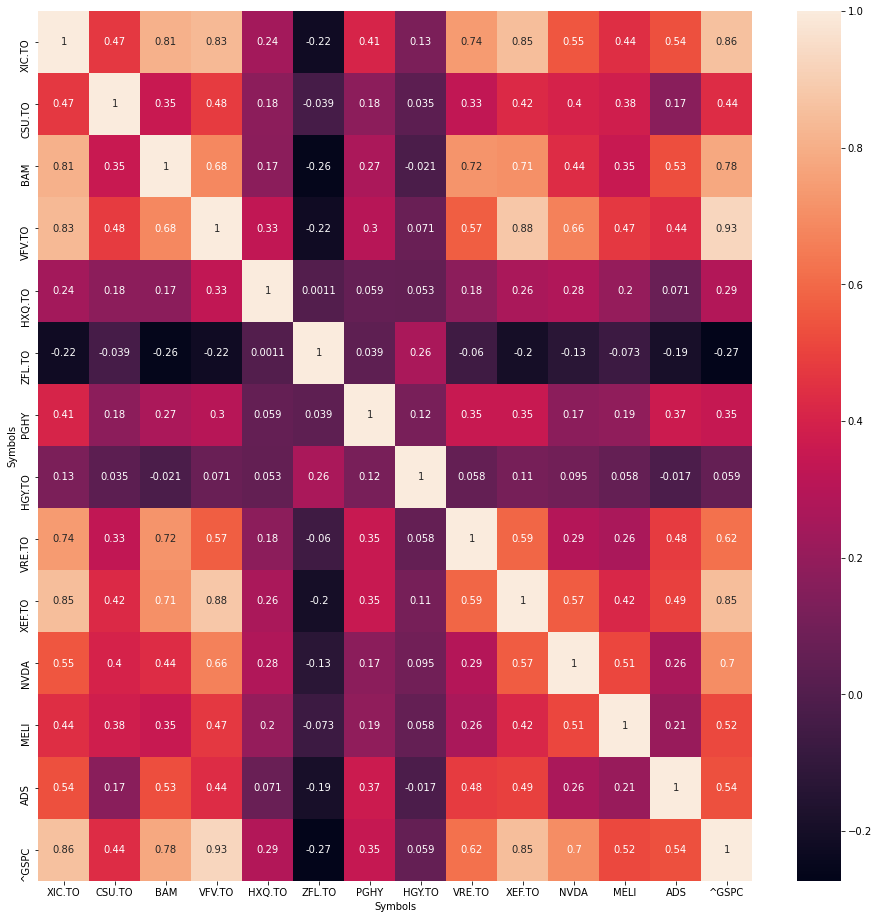

In [38]:
# Visualize correlations
plt.figure(figsize=(16, 16))
sns.heatmap(df_stock_returns.corr(), annot=True)

### Obtaining the risk free rate rf
Mostly, the rf rate is extracted from the [US government tresury bond](https://www.treasury.gov/resource-center/data-chart-center/interest-rates/Pages/TextView.aspx?data=billratesAll).

The value can be calculated or looked up online, but I will take 0 for simplicity.

In [39]:
# 3 year treasury yield
rf = 0

This rf is already the yearly value. Our current data table contains the daily returns. We need to translate these to yearly values. There are 252 trading days in a year.

In [40]:
def sharpe_calculation(stock):
    '''Function to calculate the Sharpe Ratio
    Input: Range of a stock's daily returns
    Output: Sharpe Ratio'''

    # Compound Annual Growth Rate
    cagr = ((df_stocks[stock].iloc[-1] / df_stocks[stock].iloc[0]) ** (1 / 3) - 1) * 100

    # Annualized volatility
    std_yrly = df_stock_returns[stock].std() * np.sqrt(252)

    return (cagr - rf) / std_yrly

In [41]:
# OK, let's now calculate all
for i in df_stock_returns.columns:
    if i != '^GSPC':
        print('Sharpe Ratio for {}: {:2.4}'.format(i, sharpe_calculation(i)))

Sharpe Ratio for XIC.TO: 0.8552
Sharpe Ratio for CSU.TO: 1.46
Sharpe Ratio for BAM: 0.9944
Sharpe Ratio for VFV.TO: 1.136
Sharpe Ratio for HXQ.TO: 1.121
Sharpe Ratio for ZFL.TO: 0.3429
Sharpe Ratio for PGHY: 0.3071
Sharpe Ratio for HGY.TO: 0.4901
Sharpe Ratio for VRE.TO: 0.5464
Sharpe Ratio for XEF.TO: 0.6165
Sharpe Ratio for NVDA: 2.242
Sharpe Ratio for MELI: 1.32
Sharpe Ratio for ADS: -0.2426


In [42]:
def calc_beta_alt(df, i):
    '''Function to calculate Beta (second method)
    Input: Dataframe with returns
    Output: Beta values for each stock'''

    return np.polyfit(df['^GSPC'], df_stock_returns[i], 1)

In [43]:
for i in df_stock_returns.columns:
    if i != '^GSPC':
        print('Beta for {} is {:1.2}'.format(i, calc_beta_alt(df_stock_returns, i)[0]))

Beta for XIC.TO is 0.77
Beta for CSU.TO is 0.54
Beta for BAM is 1.2
Beta for VFV.TO is 0.85
Beta for HXQ.TO is 0.8
Beta for ZFL.TO is -0.14
Beta for PGHY is 0.16
Beta for HGY.TO is 0.046
Beta for VRE.TO is 0.65
Beta for XEF.TO is 0.68
Beta for NVDA is 1.5
Beta for MELI is 1.2
Beta for ADS is 1.6


In [46]:
tickers_new = ['XIC.TO', 'MELI']
start = dt.datetime(2018, 12, 30)
end = dt.datetime(2021, 12, 30)
df_stocks_new = pdr.get_data_yahoo(tickers_new, start, end, interval="d")

df_stocks_new

Attributes  Adj Close                   Close                    High  \
Symbols        XIC.TO         MELI     XIC.TO         MELI     XIC.TO   
Date                                                                    
2018-12-31  21.078621   292.850006  23.090172   292.850006  23.120567   
2019-01-02  21.087864   298.010010  23.100304   298.010010  23.181358   
2019-01-03  20.875141   296.589996  22.867275   296.589996  23.049644   
2019-01-04  21.217354   315.329987  23.242147   315.329987  23.252279   
2019-01-07  21.319098   328.940002  23.353598   328.940002  23.373859   
...               ...          ...        ...          ...        ...   
2021-12-24  33.737690          NaN  33.939999          NaN  33.980000   
2021-12-27        NaN  1299.109985        NaN  1299.109985        NaN   
2021-12-28        NaN  1316.280029        NaN  1316.280029        NaN   
2021-12-29  34.353271  1323.560059  34.559273  1323.560059  34.680851   
2021-12-30  33.860001  1356.459961  33.860001  1356.459961  34.070000   

Attributes                     Low                    Open               \
Symbols            MELI     XIC.TO         MELI     XIC.TO         MELI   
Date                                                                      
2018-12-31   298.320007  22.907801   285.109985  23.009119   295.000000   
2019-01-02   298.869995  22.745693   282.880005  22.867275   285.609985   
2019-01-03   300.500000  22.796352   289.140015  23.049644   295.079987   
2019-01-04   317.970001  23.049644   301.010010  23.059776   301.670013   
2019-01-07   330.890015  23.161095   315.730011  23.363728   315.730011   
...                 ...        ...          ...        ...          ...   
2021-12-24          NaN  33.919998          NaN  33.950001          NaN   
2021-12-27  1310.520020        NaN  1273.000000        NaN  1275.000000   
2021-12-28  1331.410034        NaN  1301.239990        NaN  1309.829956   
2021-12-29  1330.000000  34.447823  1305.449951  34.447823  1309.969971   
2021-12-30  1359.609985  33.849998  1320.020020  33.950001  1323.500000   

Attributes    Volume            
Symbols       XIC.TO      MELI  
Date                            
2018-12-31  663264.0  390300.0  
2019-01-02  262838.0  349000.0  
2019-01-03  164632.0  564400.0  
2019-01-04  658625.0  606600.0  
2019-01-07  469121.0  467700.0  
...              ...       ...  
2021-12-24  125400.0       NaN  
2021-12-27       NaN  485800.0  
2021-12-28       NaN  407500.0  
2021-12-29  281098.0  405700.0  
2021-12-30  453900.0  441800.0  

[770 rows x 12 columns]